### AR and ARIMA models are very old and don't give any best results for real time work beause in real time we will have so many factors associated with target attribute so,  SARIMAX will be best choice for real time problems

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')


In [30]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

In [31]:
data = pd.read_csv('data/co2_mm_mlo.csv')
data.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


In [32]:
data.tail()

,year,month,decimal_date,average,interpolated
724,2018,7,2018.542,408.71,408.71
725,2018,8,2018.625,406.99,406.99
726,2018,9,2018.708,405.51,405.51
727,2018,10,2018.792,406.00,406.00
728,2018,11,2018.875,408.02,408.02


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          729 non-null    int64  
 1   month         729 non-null    int64  
 2   decimal_date  729 non-null    float64
 3   average       722 non-null    float64
 4   interpolated  729 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 28.6 KB


In [34]:
# we have to club the year and month to create a date attribute
data['date'] = pd.to_datetime(dict(year = data['year'], month = data['month'], day = 1))
data.head()

,year,month,decimal_date,average,interpolated,date
0,1958,3,1958.208,315.71,315.71,1958-03-01
1,1958,4,1958.292,317.45,317.45,1958-04-01
2,1958,5,1958.375,317.50,317.50,1958-05-01
3,1958,6,1958.458,NaN,317.10,1958-06-01
4,1958,7,1958.542,315.86,315.86,1958-07-01


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   year          729 non-null    int64         
 1   month         729 non-null    int64         
 2   decimal_date  729 non-null    float64       
 3   average       722 non-null    float64       
 4   interpolated  729 non-null    float64       
 5   date          729 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 34.3 KB


In [36]:
# set date as index 
data = data.set_index('date')
data.head()

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86


In [37]:
data.index

DatetimeIndex(['1958-03-01', '1958-04-01', '1958-05-01', '1958-06-01',
               '1958-07-01', '1958-08-01', '1958-09-01', '1958-10-01',
               '1958-11-01', '1958-12-01',
               ...
               '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01',
               '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01',
               '2018-10-01', '2018-11-01'],
              dtype='datetime64[ns]', name='date', length=729, freq=None)

In [38]:
data.index.freq = 'MS'
data.index

DatetimeIndex(['1958-03-01', '1958-04-01', '1958-05-01', '1958-06-01',
               '1958-07-01', '1958-08-01', '1958-09-01', '1958-10-01',
               '1958-11-01', '1958-12-01',
               ...
               '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01',
               '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01',
               '2018-10-01', '2018-11-01'],
              dtype='datetime64[ns]', name='date', length=729, freq='MS')

In [39]:
data.isna().sum()

year            0
month           0
decimal_date    0
average         7
interpolated    0
dtype: int64

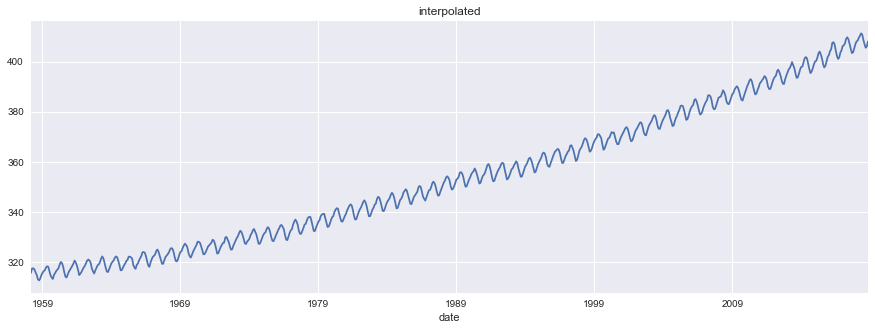

In [40]:
# we have some nan values in average attribute so we will use "interpolated" as attibute
data['interpolated'].plot(figsize = (15,5))
plt.title('interpolated')
plt.show()

- **Note**: from the above figure it is clear that it has trend and seasonality

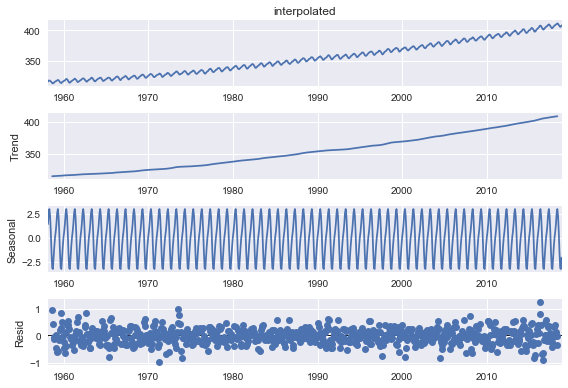

In [41]:
# check the tremd and seasonality with decomposition plot
results = seasonal_decompose(data['interpolated'], model= 'add')
results.plot();

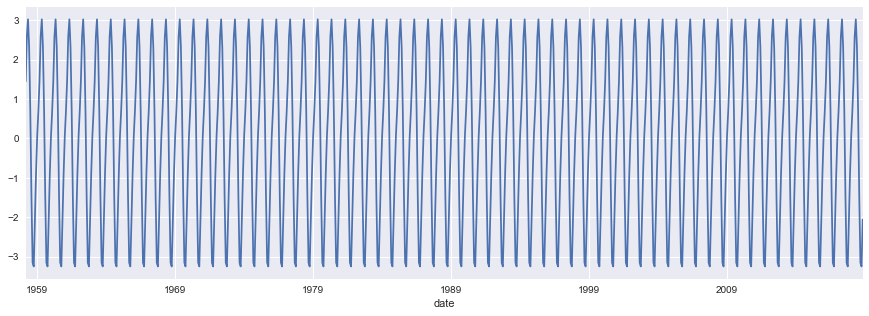

In [42]:
# we can check each individual component plot too
results.seasonal.plot(figsize = (15,5))
plt.show()

In [43]:
# run a auto_arima model to capture the SARIMAX parameter orders
auto_arima(data['interpolated'], seasonal= True, m = 12 ).summary() # m = 12 because we have monthly data

C:\Users\LOKESH\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\LOKESH\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\LOKESH\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\LOKESH\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\LOKESH\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as start

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  729
Model:             SARIMAX(0, 1, 1)x(2, 0, [1, 2], 12)   Log Likelihood                -208.336
Date:                                 Wed, 22 Jul 2020   AIC                            430.673
Time:                                         18:07:23   BIC                            462.805
Sample:                                              0   HQIC                           443.071
                                                 - 729                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7.965e-05      0.000      0.353      0.724      -0.000       0.001
ma.L1         -0.3732      0.030    -12.253      0.000      -0.433      -0.314
ar.S.L12       0.0317      0.029      1.085      0.278      -0.026       0.089
ar.S.L24       0.9677      0.029     33.010      0.000       0.910       1.025
ma.S.L12       0.1276      0.037      3.493      0.000       0.056       0.199
ma.S.L24      -0.8654      0.055    -15.849      0.000      -0.972      -0.758
sigma2         0.0952      0.006     16.289      0.000       0.084       0.107
===================================================================================
Ljung-Box (Q):                       50.35   Jarque-Bera (JB):                 4.24
Prob(Q):                              0.13   Prob(JB):                         0.12
Heteroskedasticity (H):               1.12   Skew:                            -0.04
Prob(H) (two-sided):                  0.38   Kurtosis:                         3.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
data.shape

(729, 5)

### Train and Test split

In [45]:
train = data.iloc[:717]
test = data.iloc[717:]

### Model Building

In [46]:
model = SARIMAX(train['interpolated'], order= (0, 1, 1), seasonal_order= (2, 0, [1, 2], 12))

In [47]:
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                            interpolated   No. Observations:                  717
Model:             SARIMAX(0, 1, 1)x(2, 0, [1, 2], 12)   Log Likelihood                -205.142
Date:                                 Wed, 22 Jul 2020   AIC                            422.285
Time:                                         18:07:58   BIC                            449.727
Sample:                                     03-01-1958   HQIC                           432.882
                                          - 11-01-2017                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3707      0.034    -10.767      0.000      -0.438      -0.303
ar.S.L12       0.8747      0.050     17.553      0.000       0.777       0.972
ar.S.L24       0.1249      0.050      2.505      0.012       0.027       0.223
ma.S.L12      -0.7363      0.047    -15.798      0.000      -0.828      -0.645
ma.S.L24      -0.1123      0.038     -2.933      0.003      -0.187      -0.037
sigma2         0.0960      0.005     20.157      0.000       0.087       0.105
===================================================================================
Ljung-Box (Q):                       51.89   Jarque-Bera (JB):                 3.76
Prob(Q):                              0.10   Prob(JB):                         0.15
Heteroskedasticity (H):               1.13   Skew:                            -0.02
Prob(H) (two-sided):                  0.35   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [48]:
# to find test data
start = len(train)
end = start + len(test) - 1

### Predictions

In [49]:
predictions = results.predict(start= start, end= end, typ = 'levels').rename('SARIMA predictions')

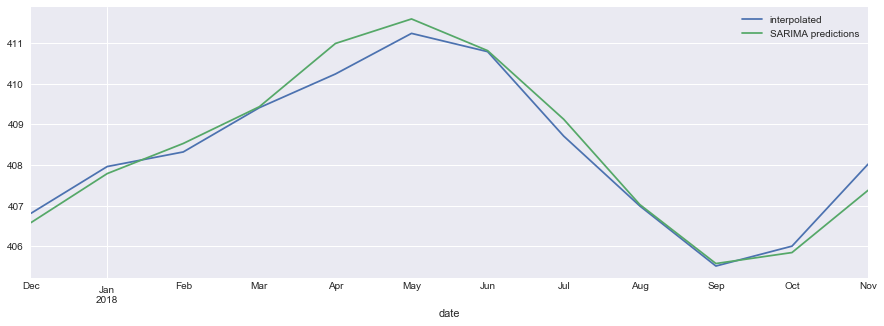

In [50]:
test['interpolated'].plot(figsize = (15,5))
predictions.plot()
plt.legend()
plt.show()

In [51]:
from statsmodels.tools.eval_measures import rmse

In [52]:
error = rmse(test['interpolated'], predictions)
error

0.34581061348325204

### Forecast into the future

In [53]:
model_f = SARIMAX(data['interpolated'], order= (0, 1, 1), seasonal_order= (2, 0, [1, 2], 12))
results_f = model_f.fit()

C:\Users\LOKESH\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


In [54]:
forecast = results_f.predict(start= len(data), end = len(data)+ 11, typ = 'levels').rename('SARIMA forecasts') # 11 months

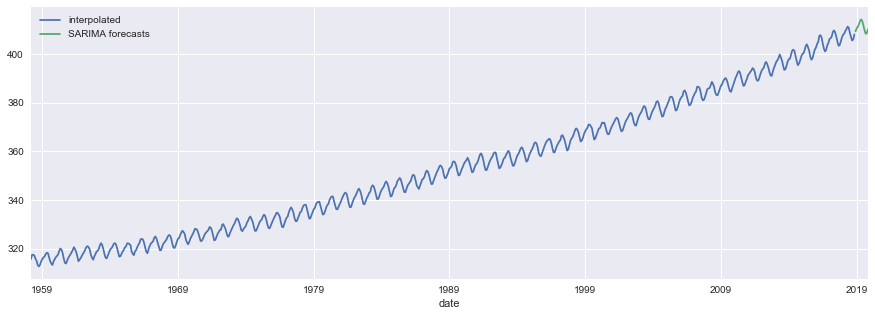

In [55]:
data['interpolated'].plot(figsize = (15,5), legend = True)
forecast.plot(legend = True)
plt.show()

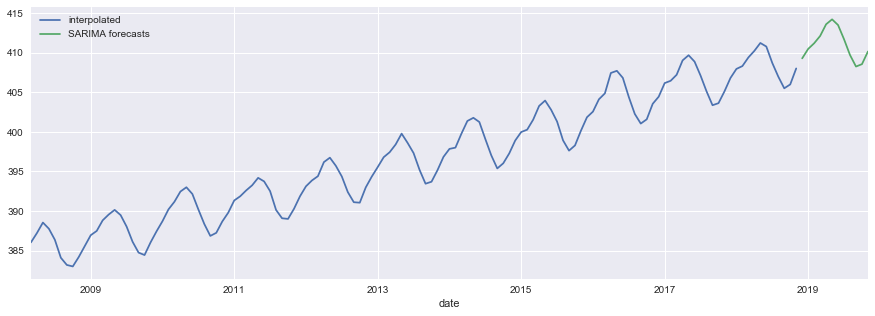

In [56]:
# to give you a clear idea , just cut the few years
data['interpolated'].iloc[600:].plot(figsize = (15,5), legend = True)
forecast.plot(legend = True)
plt.show()